In [1]:
%matplotlib inline


# Bonus: Affine and AI





### our image backbone libraries

In [7]:
#import libraries
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image
from skimage import data, io, color, img_as_float, exposure

### libraries generally good to have around

In [2]:
import os
import glob
import numpy as np
#import pandas as pd
import ipywidgets as widgets
import sys


In [41]:

from skimage import data
from skimage import transform
from skimage import img_as_float

In [3]:
# configure our data
pict1 = "france_cc0.jpg"

### Let's examine out image

In [4]:
#from skimage import data, io, color
image_h = io.imread(pict1)

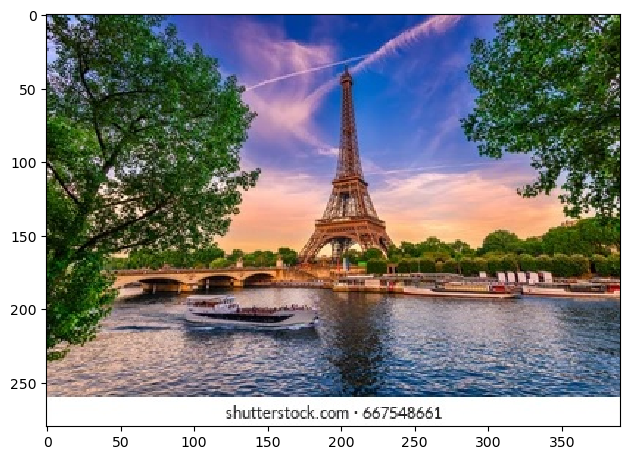

In [5]:
io.imshow(image_h)

In [27]:
## Let's look at some non-geometric transformation

C:\Users\makeda\AppData\Local\Temp\ipykernel_26232\2194092551.py:50: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype=np.object)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\makeda\anaconda3\envs\image_libraries\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
C:\Users\makeda\anaconda3\envs\image_libraries\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on

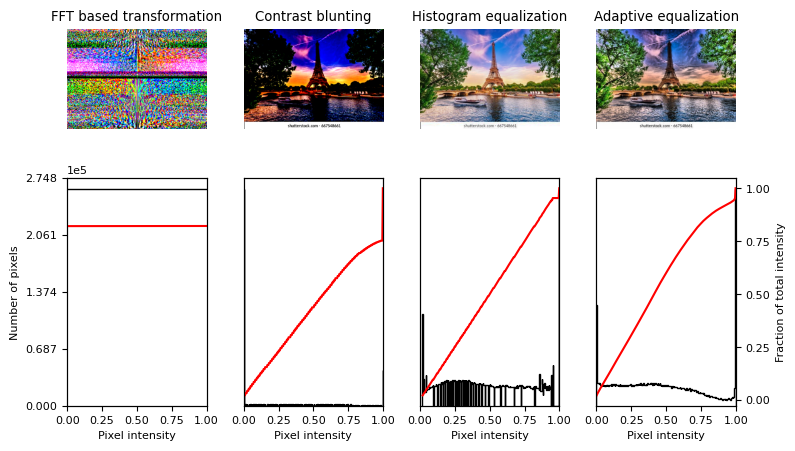

In [26]:
matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = image_h

# Make an FFT trasnform

made_fourier = np.fft.fftshift(np.fft.fft2(image_h))

# Contrast blunting
p60, p90 = np.percentile(img, (60, 90))
img_rescale = exposure.rescale_intensity(img, in_range=(p60, p90))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(made_fourier[::1].real, axes[:, 0])
ax_img.set_title('FFT based transformation')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast blunting')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()



## Now let's get into geometric transformations

NB: rescale, resize etc. are geometric transformations, but so are all affines, which can be rotates or shears

Geometrical transformations involve multiplying our image matrix by another. 
NB: there is always a matrix that will not change ours, the identity matrix.

In [33]:
#identity matrices are preformulated in numpy
our_identity_matrix = np.eye(image_h.shape[0], image_h.shape[1], dtype=int)

In [34]:
our_identity_matrix.shape 

(280, 390)

### let's now check that this works:

In [ ]:
class skimage.transform.EuclideanTransform(matrix=None, rotation=None, translation=None, *, dimensionality=2)

inherits from ProjectiveTransfoorm,

below from documentation in code itself

matrix : (D+1, D+1) array, optional
        Homogeneous transformation matrix.
rotation : float or sequence of float, optional
        Rotation angle in counter-clockwise direction as radians. If given as
        a vector, it is interpreted as Euler rotation angles [1]_. Only 2D
        (single rotation) and 3D (Euler rotations) values are supported. For
        higher dimensions, you must provide or estimate the transformation
        matrix.
translation : sequence of float, length D, optional
        Translation parameters for each axis.
dimensionality : int, optional
        The dimensionality of the transform.

In [47]:
tform = transform.EuclideanTransform(
    rotation= 1.,
    translation = (100, -20)
    )
print(tform.params)

[[  0.54030231  -0.84147098 100.        ]
 [  0.84147098   0.54030231 -20.        ]
 [  0.           0.           1.        ]]


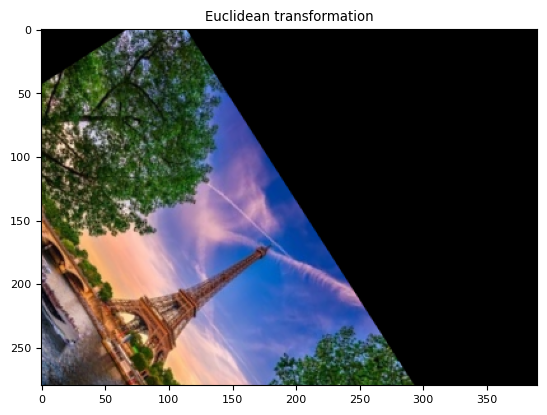

In [48]:
img = img_as_float(image_h)
tf_img = transform.warp(img, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('Euclidean transformation')

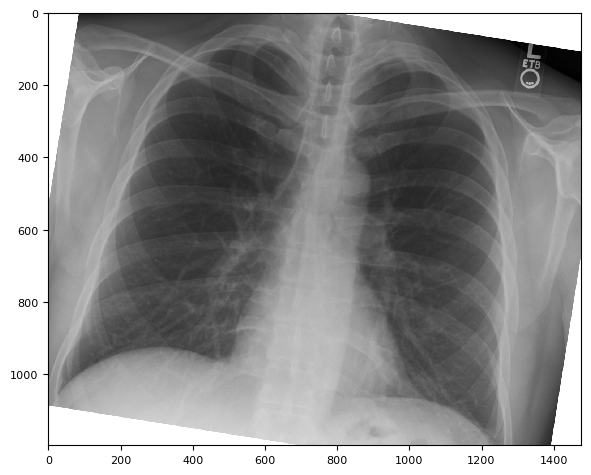

In [36]:
image_g = io.imread('rotatechest.png')
io.imshow(image_g)

An affine transformation is a transform that is one or  any combination of the following:

    Shifting
    Scaling
    Flipping over any axis
    Rotating
    Shearing

